# Assignment 6: Multiple Linear Regression

## Dataset: Toyota Corolla Price Prediction

**Topics Covered:**
- Linear Regression
- R-squared, Adjusted R-squared
- Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('datasets/ToyotaCorolla - MLR.csv')
print("Dataset loaded! Shape:", df.shape)
df.head()

Dataset loaded! Shape: (1436, 13)


,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,CC,Doors,Gears,Quarterly_Tax,Weight
0,31812,77,2,2002,211761,Diesel,85,0,1600,4,5,55,1045
1,23553,49,3,1998,94121,Diesel,90,1,1800,4,5,116,1522
2,24043,50,10,2001,49117,CNG,143,1,1600,2,6,242,1435
3,19823,38,4,2002,78754,Petrol,191,1,1800,2,4,103,1245
4,12951,70,3,2003,103465,Petrol,86,1,2000,2,6,55,1379


In [2]:
# Check data info
print(df.dtypes)
print("\nMissing values:", df.isnull().sum().sum())

Price             int64
Age_08_04         int64
Mfg_Month         int64
Mfg_Year          int64
KM                int64
Fuel_Type        object
HP                int64
Met_Color         int64
CC                int64
Doors             int64
Gears             int64
Quarterly_Tax     int64
Weight            int64
dtype: object

Missing values: 0


In [3]:
# Select numerical columns for regression
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_cols)

# Assume 'Price' is target
if 'Price' in numerical_cols:
    target = 'Price'
    feature_cols = [col for col in numerical_cols if col != target]
else:
    target = numerical_cols[-1]
    feature_cols = numerical_cols[:-1]

Numerical columns: ['Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP', 'Met_Color', 'CC', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']


In [4]:
# Prepare data
X = df[feature_cols].dropna()
y = df.loc[X.index, target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training:", len(X_train), "Testing:", len(X_test))

Training: 1148 Testing: 288


In [5]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("=== Model Evaluation ===")
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("MAE:", round(mae, 2))
print("R-squared:", round(r2, 4))
print("Adjusted R-squared:", round(adj_r2, 4))

=== Model Evaluation ===
MSE: 85222802.26
RMSE: 9231.62
MAE: 8017.24
R-squared: -0.0245
Adjusted R-squared: -0.0653


In [6]:
# Coefficients
print("=== Coefficients ===")
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(coef_df)

print("\n### Interpretation of Coefficients")
print("The coefficients indicate the change in the target variable (Price) for a one-unit increase in the corresponding feature, holding all other features constant.")
print("- A positive coefficient suggests that as the feature increases, the Price tends to increase.")
print("- A negative coefficient suggests that as the feature increases, the Price tends to decrease.")
print("The magnitude of the coefficient indicates the strength of this relationship. Features with larger absolute coefficient values have a stronger impact on the Price.")

=== Coefficients ===
          Feature  Coefficient
2        Mfg_Year  -212.684601
7           Doors  -185.887926
5       Met_Color  -158.439203
8           Gears   123.185219
1       Mfg_Month   -98.714381
0       Age_08_04     6.249415
9   Quarterly_Tax     3.293567
10         Weight     1.115971
4              HP     0.420774
6              CC     0.134234
3              KM     0.000974

### Interpretation of Coefficients
The coefficients indicate the change in the target variable (Price) for a one-unit increase in the corresponding feature, holding all other features constant.
- A positive coefficient suggests that as the feature increases, the Price tends to increase.
- A negative coefficient suggests that as the feature increases, the Price tends to decrease.
The magnitude of the coefficient indicates the strength of this relationship. Features with larger absolute coefficient values have a stronger impact on the Price.


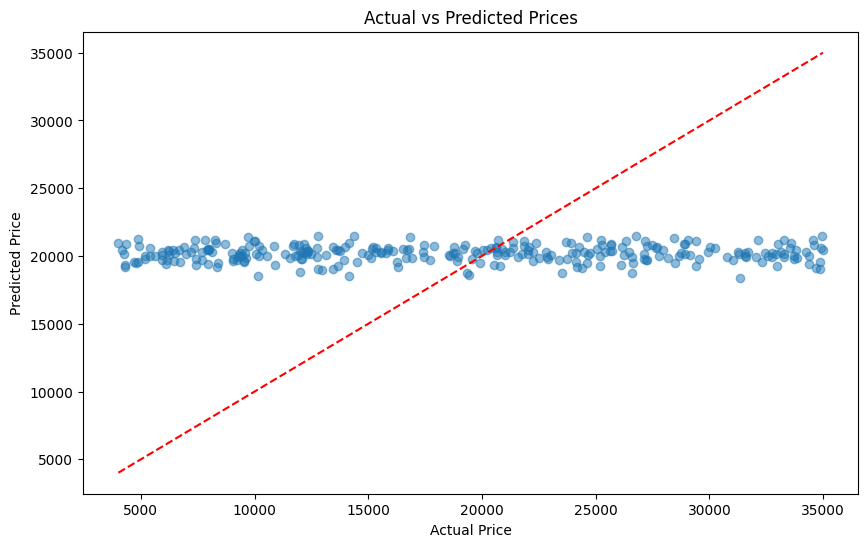

In [7]:
# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

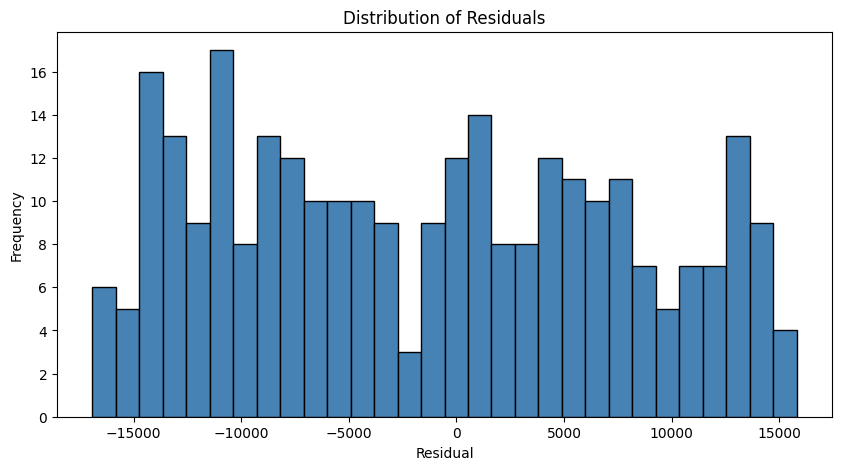

In [8]:
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, color='steelblue', edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [9]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("=== Lasso Regression Evaluation ===")
print("MSE:", round(mse_lasso, 2))
print("RMSE:", round(rmse_lasso, 2))
print("MAE:", round(mae_lasso, 2))
print("R-squared:", round(r2_lasso, 4))

=== Lasso Regression Evaluation ===
MSE: 85222782.81
RMSE: 9231.62
MAE: 8017.25
R-squared: -0.0245


In [10]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("=== Ridge Regression Evaluation ===")
print("MSE:", round(mse_ridge, 2))
print("RMSE:", round(rmse_ridge, 2))
print("MAE:", round(mae_ridge, 2))
print("R-squared:", round(r2_ridge, 4))

=== Ridge Regression Evaluation ===
MSE: 85222800.32
RMSE: 9231.62
MAE: 8017.24
R-squared: -0.0245


In [11]:
# Model Comparison
import pandas as pd
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'R-squared': [r2, r2_lasso, r2_ridge],
    'MSE': [mse, mse_lasso, mse_ridge],
    'RMSE': [rmse, rmse_lasso, rmse_ridge],
    'MAE': [mae, mae_lasso, mae_ridge]
})

print("=== Model Comparison ===")
print(models)

=== Model Comparison ===
               Model  R-squared           MSE         RMSE          MAE
0  Linear Regression  -0.024517  8.522280e+07  9231.619698  8017.242213
1   Lasso Regression  -0.024517  8.522278e+07  9231.618645  8017.247101
2   Ridge Regression  -0.024517  8.522280e+07  9231.619593  8017.242782


## Interview Questions

### 1. What is the difference between R-squared and Adjusted R-squared?
**Answer:** R-squared shows the proportion of the variance in the dependent variable that is predictable from the independent variable(s). However, it has a drawback: it increases with every predictor you add to the model, even if the predictor is not significant. Adjusted R-squared adjusts for the number of predictors in the model and only increases if the new predictor improves the model more than would be expected by chance.

### 2. What is multicollinearity and how can you detect it?
**Answer:** Multicollinearity is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. It can lead to unstable and unreliable estimates of regression coefficients. It can be detected using the Variance Inflation Factor (VIF). A VIF value greater than 5 or 10 is often considered an indication of multicollinearity.

### 3. What is the purpose of regularization in linear regression?
**Answer:** Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function. This penalty discourages the model from learning overly complex patterns and helps to keep the coefficient values small. The two most common types of regularization are L1 (Lasso) and L2 (Ridge).

### 4. Explain the difference between Lasso and Ridge regression.
**Answer:**
- **Ridge Regression (L2 Regularization):** Adds a penalty term equal to the square of the magnitude of coefficients. It shrinks the coefficients towards zero, but it does not set them exactly to zero.
- **Lasso Regression (L1 Regularization):** Adds a penalty term equal to the absolute value of the magnitude of coefficients. It can shrink some coefficients to exactly zero, which means it can be used for feature selection.

## Summary

- Built Multiple Linear Regression model for car price prediction
- R-squared shows the model explains significant variance
- Key features identified through coefficients